In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [4]:
df.shape

(30, 2)

In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

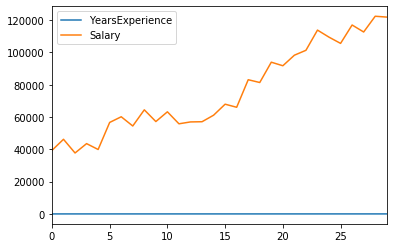

In [7]:
df.plot()

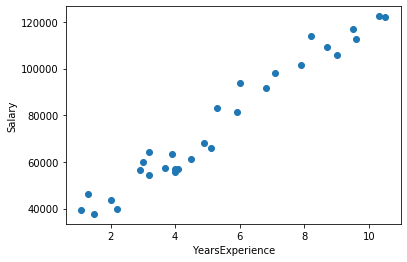

In [8]:
plt.scatter(df.YearsExperience,df.Salary)
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [9]:
x=df[['YearsExperience']]
y=df.Salary

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
linreg=LinearRegression()

In [13]:
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
linreg.coef_

array([9577.17174975])

In [15]:
linreg.intercept_

25975.814659541138

In [16]:
y_pred=linreg.predict(x_test)

In [17]:
y_pred_train=linreg.predict(x_train)

In [18]:
from sklearn import metrics

In [19]:
metrics.r2_score(y_test,y_pred)

0.9746363787521536

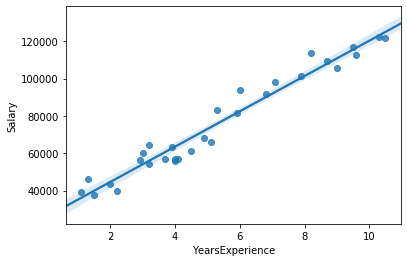

In [30]:
sns.regplot(df.YearsExperience,df.Salary)

In [20]:
metrics.r2_score(y_test,y_pred)

0.9746363787521536

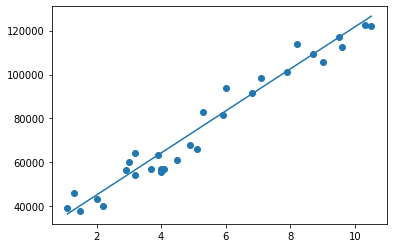

In [21]:
plt.scatter(df.YearsExperience,df.Salary)
plt.plot(df.YearsExperience,9577*df.YearsExperience+25975.814659541138)
plt.show()

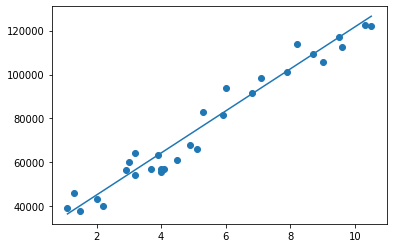

In [22]:
plt.scatter(df.YearsExperience,df.Salary)
plt.plot(df.YearsExperience,linreg.coef_*df.YearsExperience+linreg.intercept_)
plt.show()

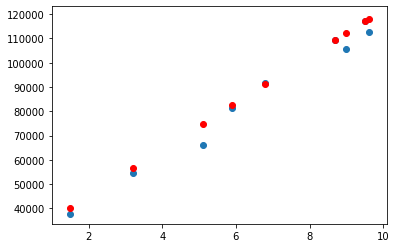

In [23]:
plt.scatter(x_test,y_test)
plt.scatter(x_test,y_pred,color='r')

In [24]:
import statsmodels.api as sm

In [25]:
x_train_sm=sm.add_constant(x_train)
x_train_sm

C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,YearsExperience
28,1.0,10.3
10,1.0,3.9
3,1.0,2.0
1,1.0,1.3
19,1.0,6.0
22,1.0,7.9
12,1.0,4.0
5,1.0,2.9
14,1.0,4.5
0,1.0,1.1


In [26]:
lr=sm.OLS(y_train,x_train_sm).fit()

In [27]:
lr.params

const              25975.81466
YearsExperience     9577.17175
dtype: float64

In [28]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     314.3
Date:                Wed, 25 Sep 2019   Prob (F-statistic):           2.81e-13
Time:                        19:56:31   Log-Likelihood:                -213.11
No. Observations:                  21   AIC:                             430.2
Df Residuals:                      19   BIC:                             432.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.598e+04   2939.485     